## Problem Statement :
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. HELP International have been able to raise around $ 10 million. This money now needs to be allocated strategically and effectively. Hence, inorder to decide the selection of the countries that are in the direst need of aid, data driven decisions are to be made. Thus, it becomes necessary to categorise the countries using socio-economic and health factors that determine the overall development of the country. Thus, based on these clusters of the countries depending on their conditions, funds will be allocated for assistance during the time of disasters and natural calamities. It is a clear cut case of unsupervised learning where we have to create clusters of the countries based on the different feature present.

Aim :
-To cluster countries based on numerical features.
-It is an Unsupervised Learning problem statement.

                           Dataset Attributes

country : Name of the country.

child_mort : Death of children under 5 years of age per 1000 live births.

exports : Exports of goods and services per capita. Given as %age of the GDP per capita.

health : Total health spending per capita. Given as %age of GDP per capita.

imports : Imports of goods and services per capita. Given as %age of the GDP per capita.

Income : Net income per person.

Inflation : The measurement of the annual growth rate of the Total GDP.

life_expec : The average number of years a new born child would live if the current mortality patterns are to rem...

total_fer : The number of children that would be born to each woman if the current age-fertility rates remain th...

gdpp : The GDP per capita. Calculated as the Total GDP divided by the total population.

# Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
%matplotlib inline

# General information about dataset

In [2]:
data=pd.read_csv('Country-data.csv')

In [3]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [4]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
data['country'].nunique()

167

In [8]:
data.shape

(167, 10)

# data visualising

C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

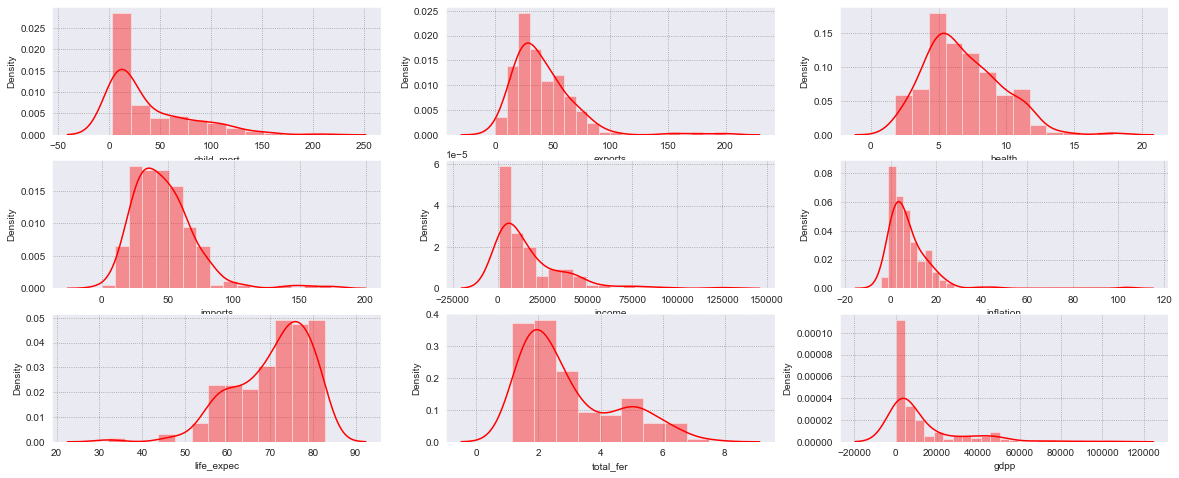

In [9]:
c=1
plt.figure(figsize=(20,8))
for i in data.drop('country',axis=1):
    plt.subplot(3,3,c)
    sns.distplot(data[i],color="r")
    c=c+1

<AxesSubplot:xlabel='health', ylabel='child_mort'>

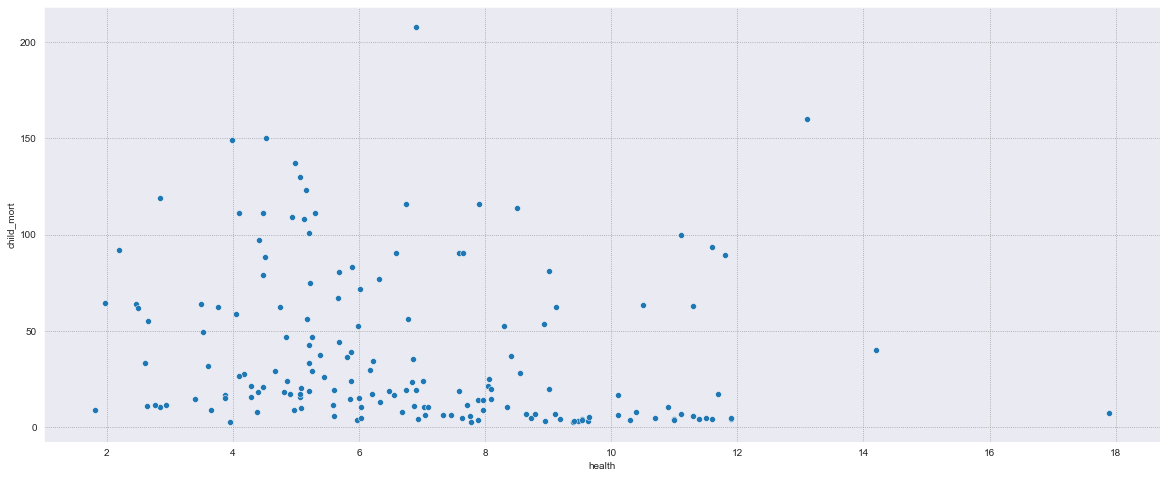

In [10]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=data,x='health',y='child_mort')

<Figure size 1440x576 with 0 Axes>

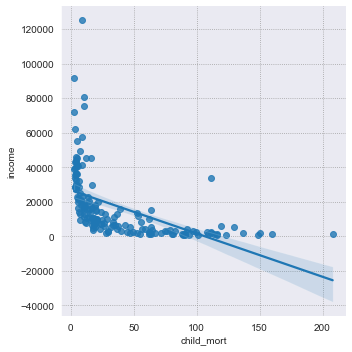

In [11]:
plt.figure(figsize=(20,8))

sns.lmplot(data=data,x='child_mort',y='income')

C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'the correlation between the gdpp and life expection'}, xlabel='income', ylabel='life_expec'>

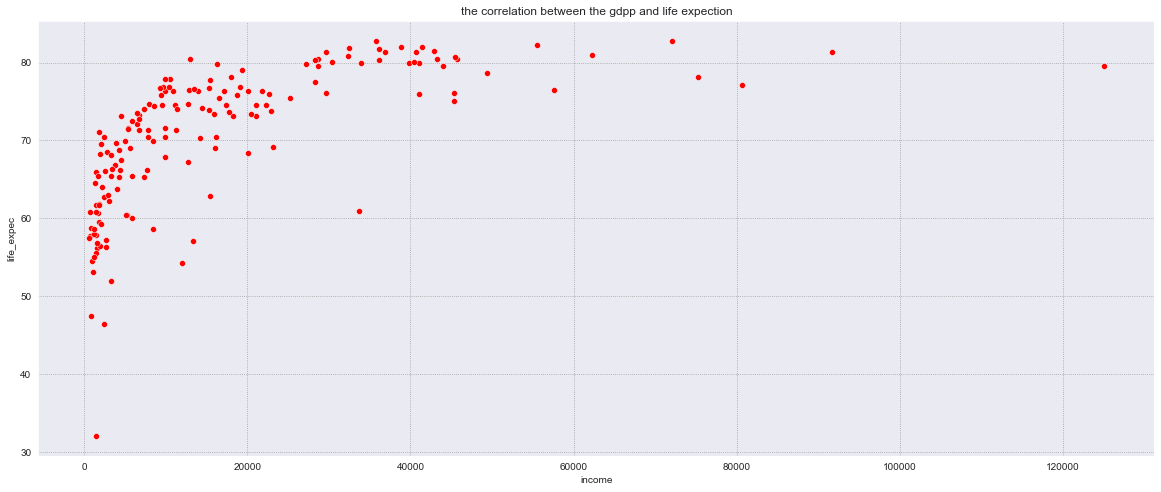

In [12]:
plt.figure(figsize=(20,8))
plt.title("the correlation between the gdpp and life expection")
sns.scatterplot(data['income'],data['life_expec'],color='r')

<AxesSubplot:title={'center':'the correlation between the gdpp and inflation'}, xlabel='gdpp', ylabel='inflation'>

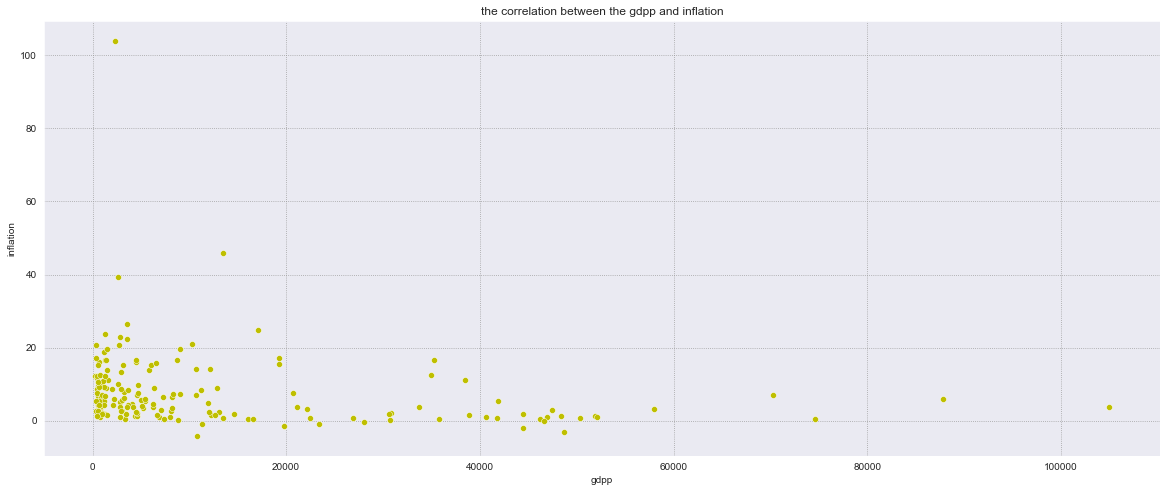

In [13]:
plt.figure(figsize=(20,8))
plt.title("the correlation between the gdpp and inflation")
sns.scatterplot(data=data,x=data['gdpp'],y=data['inflation'],color='y')

<AxesSubplot:title={'center':'the correlation between the gdpp and income'}, xlabel='gdpp', ylabel='income'>

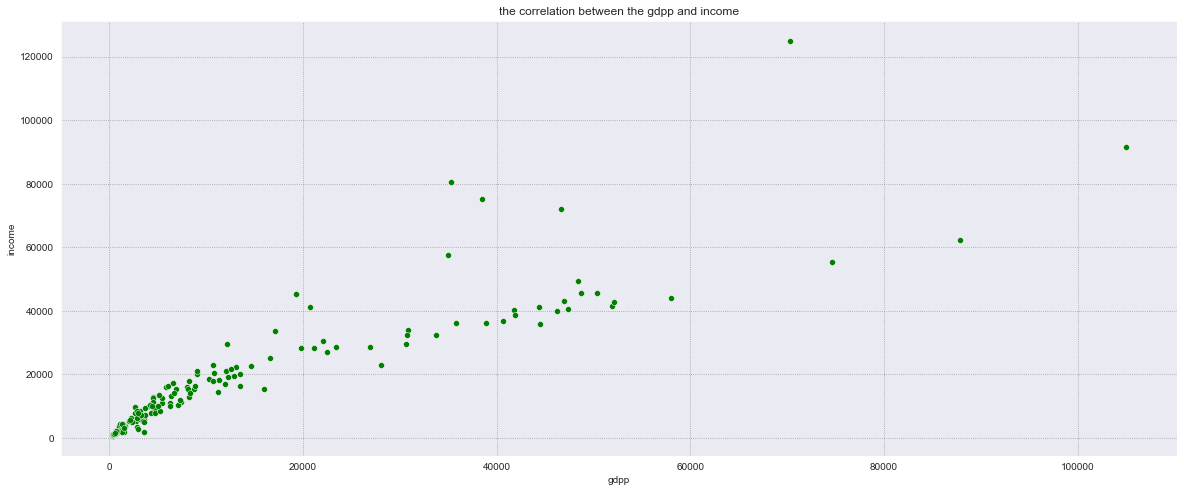

In [14]:
plt.figure(figsize=(20,8))
plt.title("the correlation between the gdpp and income")
sns.scatterplot(data=data,x=data['gdpp'],y=data['income'],color='g')

C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

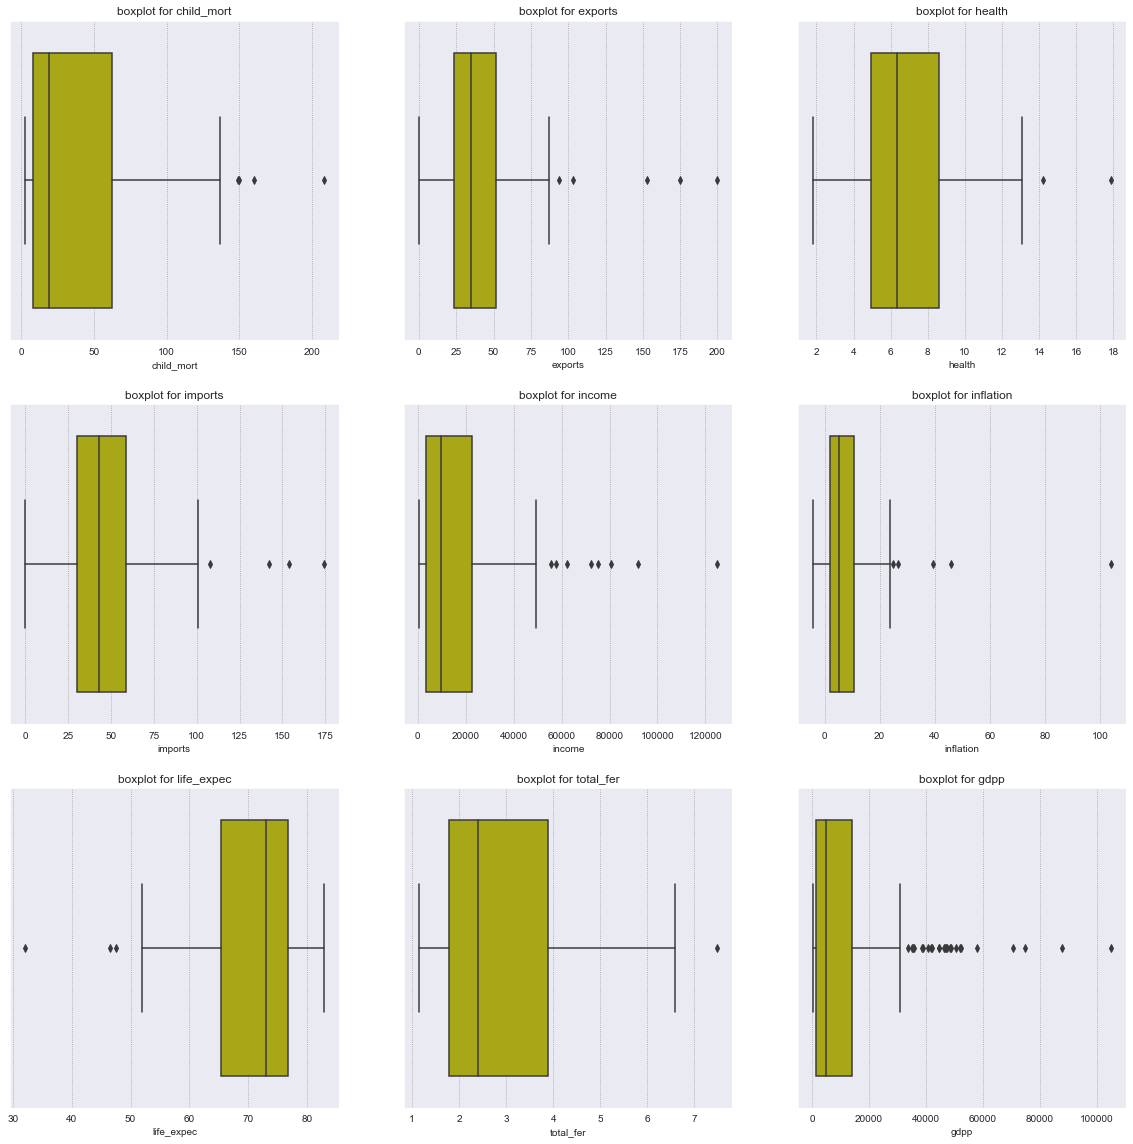

In [15]:
c=1
plt.figure(figsize=(20,20))
for i in data.drop('country',axis=1):
    plt.subplot(3,3,c)
    plt.title("boxplot for "+i)
    sns.boxplot(data[i],color="y")
    c=c+1

C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

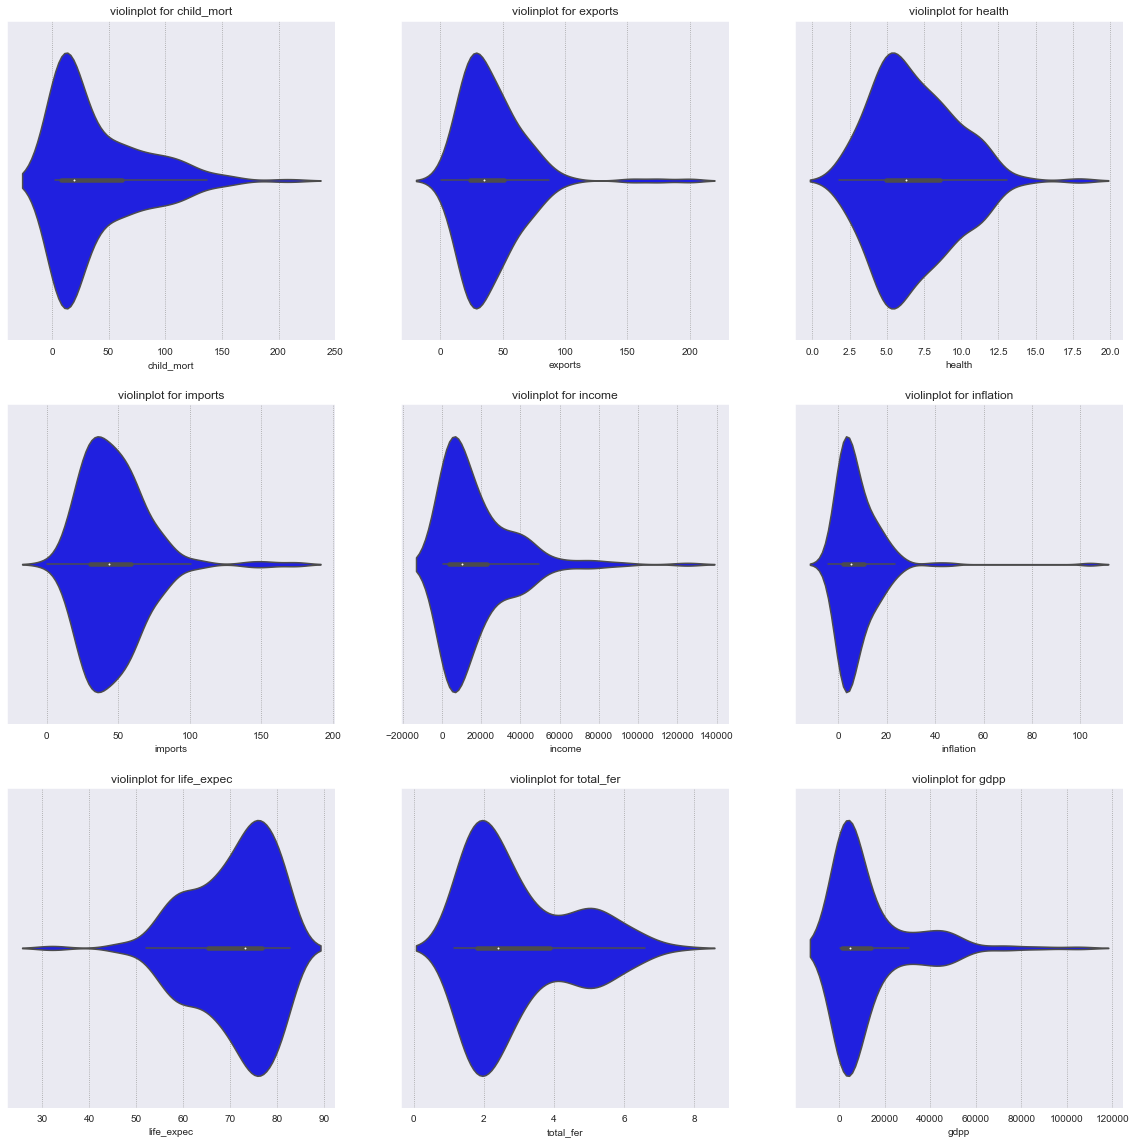

In [16]:
c=1
plt.figure(figsize=(20,20))
for i in data.drop('country',axis=1):
    plt.subplot(3,3,c)
    plt.title("violinplot for "+i)
    sns.violinplot(data[i],color="b")
    c=c+1

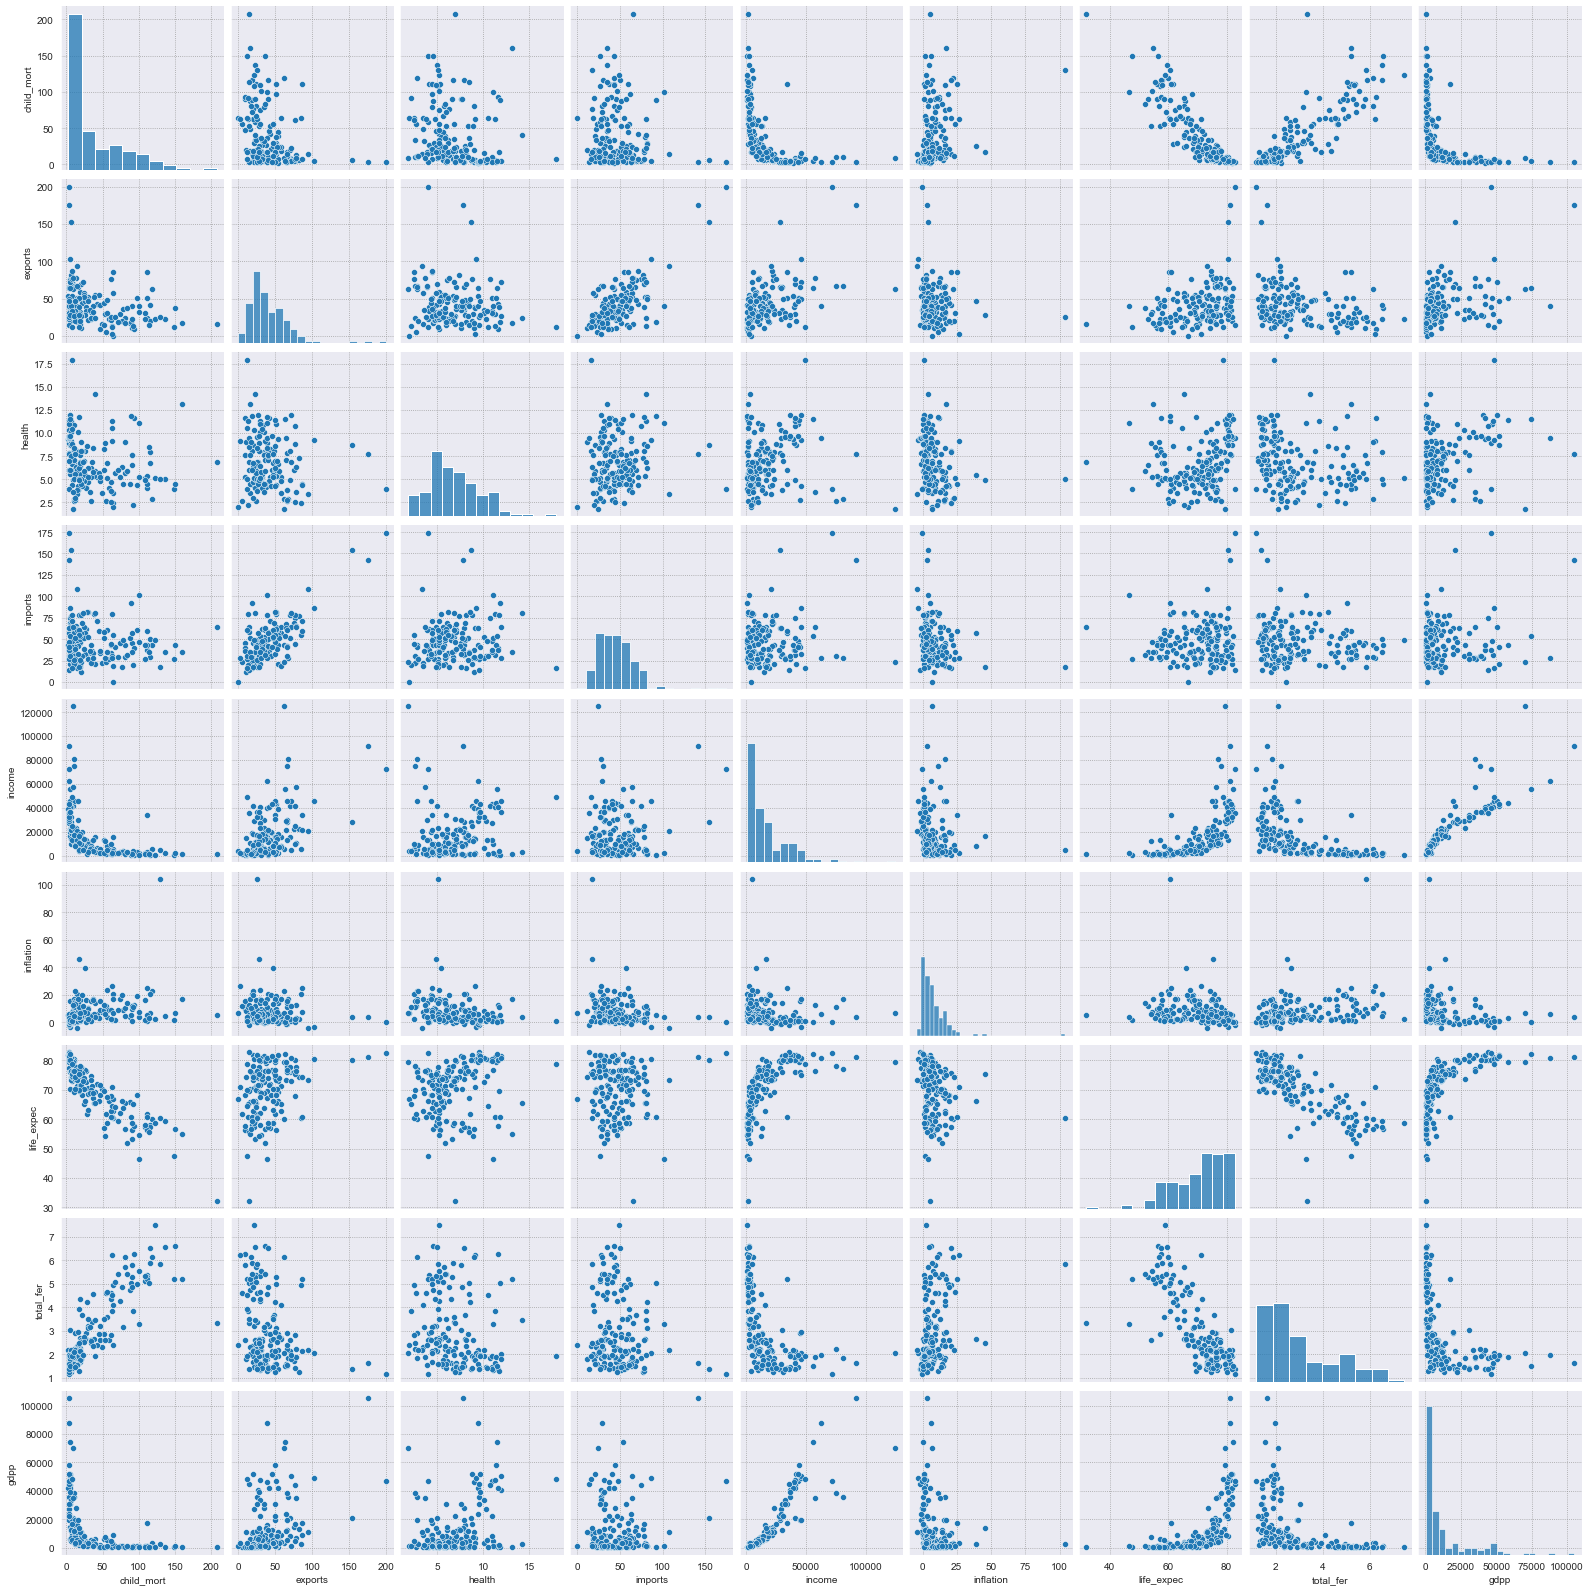

In [17]:
sns.pairplot(data)

<AxesSubplot:title={'center':'corr between columns'}>

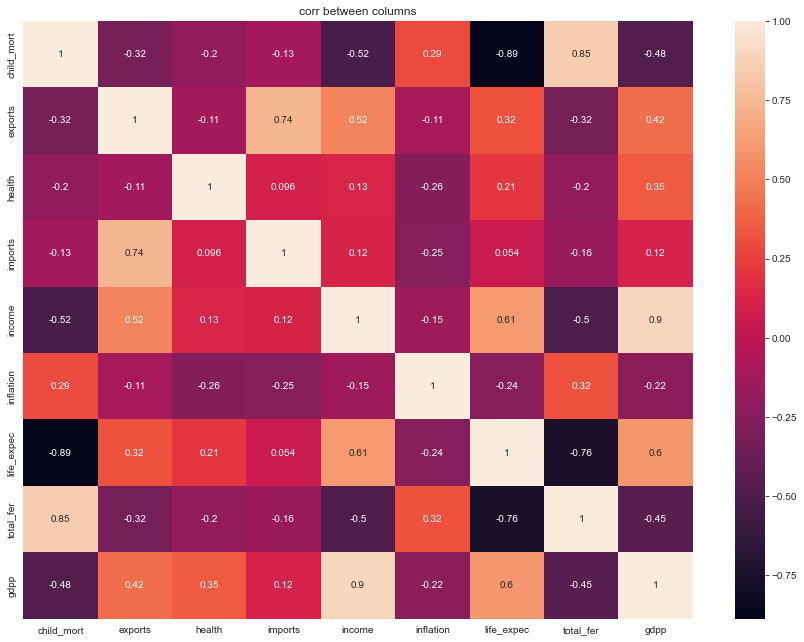

In [19]:
plt.figure(figsize=(15,11))
plt.title("corr between columns")
sns.heatmap(data.drop('country',axis=1).corr(),annot=True)

# Modeling

In [20]:
data=data.drop('country',axis=1)

In [21]:
test=[]
for i in range(1,11):
    k=KMeans(i)
    k.fit(data)
    test.append(k.inertia_)

C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\sklearn\cluster\_kmeans.py:1332: 

# elbow method

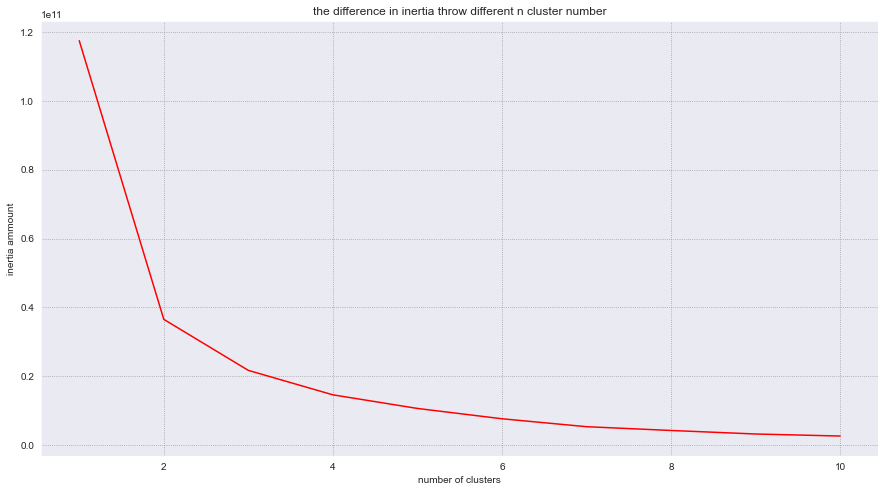

In [22]:

plt.figure(figsize=(15,8))
plt.title("the difference in inertia throw different n cluster number")
plt.xlabel("number of clusters")
plt.ylabel("inertia ammount")
plt.plot(range(1,11),test,color="r")

In [23]:
range_n_clusters=[2,3,4,5,6]
X=data

# Evaluating

C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.7256314906273207


C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.7003508054481694


C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.6109297437247547


C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.5734773443272871


C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.589653373502461


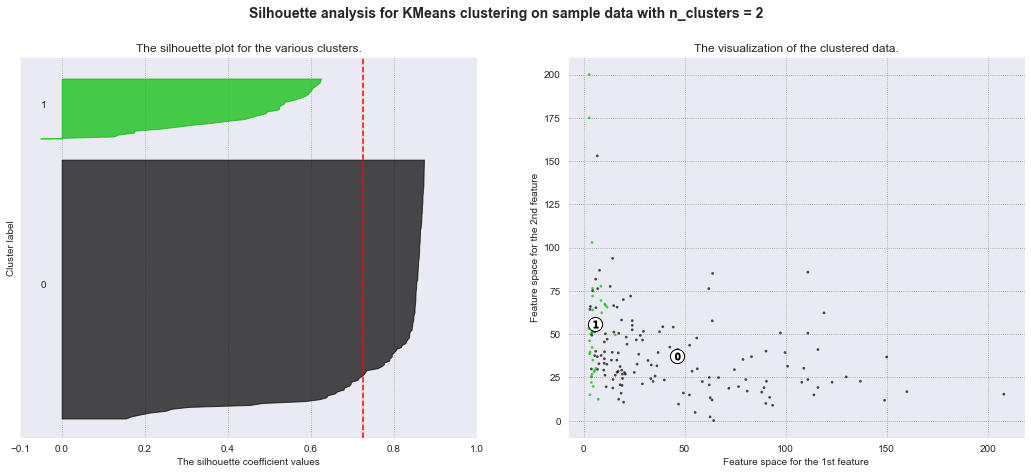

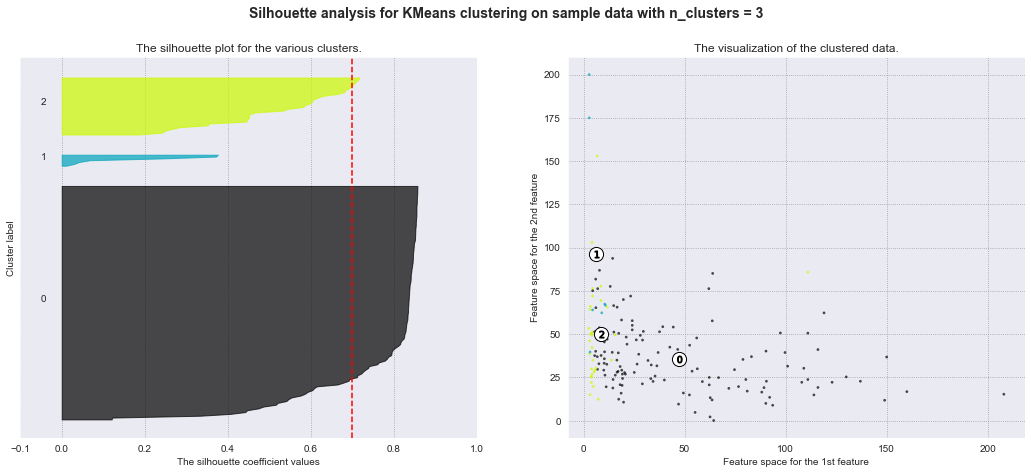

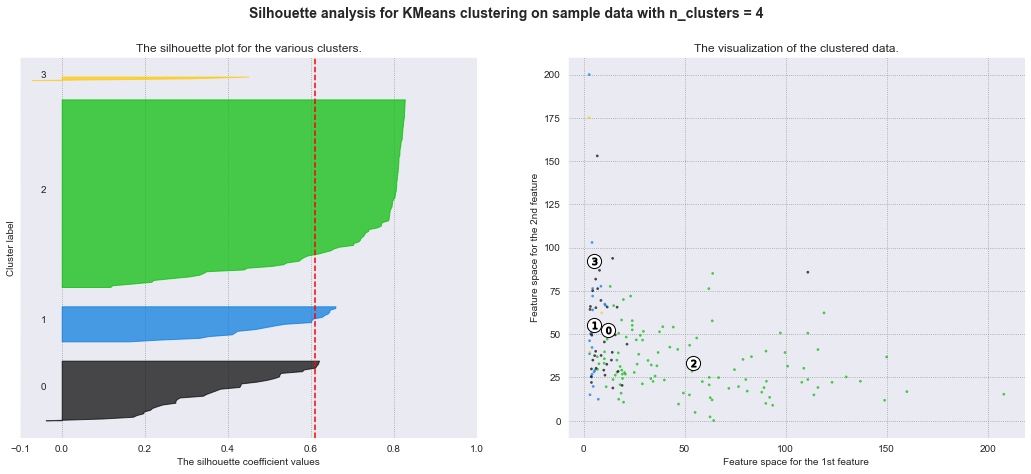

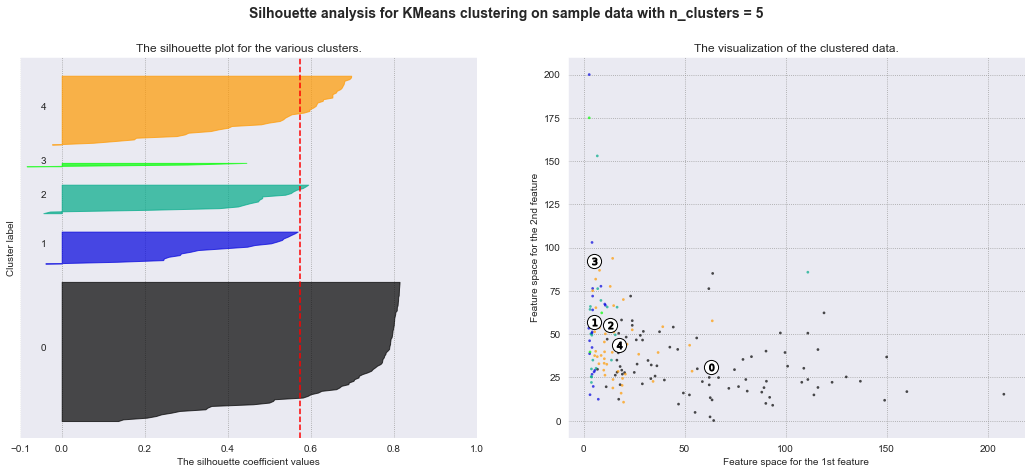

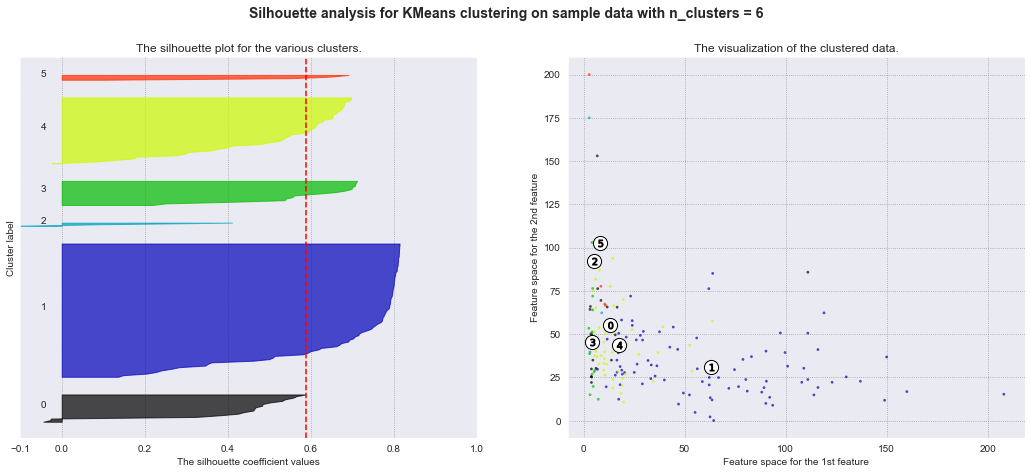

In [24]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


In [25]:
#so we have seen 
#the best choise of cluster number is 3

In [26]:
k=KMeans(3)
k.fit(data)
label=k.fit_predict(data)

C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# PCA

In [27]:
scale=StandardScaler()

In [28]:
dataScaled=scale.fit_transform(data)

In [29]:
pca=PCA(n_components=2)

In [30]:
pca.fit(data)

PCA(n_components=2)

In [31]:
pcdata=pca.transform(dataScaled)

C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [32]:
pcdata.shape

(167, 2)

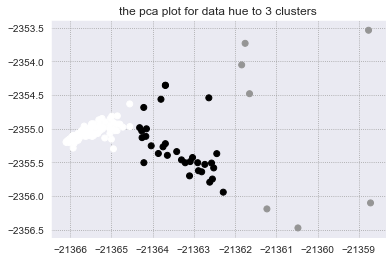

In [33]:
plt.title("the pca plot for data hue to 3 clusters")
plt.scatter(pcdata[:,0],pcdata[:,1],c=label,cmap='Greys')